In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
vix_data = pd.read_excel("vix_data.xlsx")
filtered_Data = vix_data.loc[8:][[1,2,3,4,5,6,7,8,9,10]]

In [3]:
date_time = filtered_Data[1]

In [4]:
date_time_index = pd.DatetimeIndex(date_time)

In [5]:
converted_Data = np.array(vix_data.loc[8:][[2,3,4,5,6,7,8,9,10]]).astype(float)

In [6]:
rollingDays = np.array(vix_data.loc[8:][14]).astype(int)
rollingDays

array([17, 16, 15, ...,  3,  2,  1])

In [7]:
vix_updated_Data = pd.DataFrame(converted_Data, columns=["UVXY","SPY","VXXBEN","VIX", "UX1", "UX2", "UX3","UX4", "Day OF Week"], index= date_time_index)

In [8]:
vix_updated_Data.index.names = ["Date"]

In [9]:
vix_updated_Data["Day OF Week"] = vix_updated_Data["Day OF Week"].astype(int)

In [10]:
vix_updated_Data["Rolling Days"] = rollingDays

In [11]:
vix_updated_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3246 entries, 2006-10-23 to 2019-09-16
Data columns (total 10 columns):
UVXY            3246 non-null float64
SPY             3246 non-null float64
VXXBEN          3246 non-null float64
VIX             3246 non-null float64
UX1             3246 non-null float64
UX2             3246 non-null float64
UX3             3246 non-null float64
UX4             3246 non-null float64
Day OF Week     3246 non-null int64
Rolling Days    3246 non-null int64
dtypes: float64(8), int64(2)
memory usage: 279.0 KB


In [12]:
filtered_Data = vix_updated_Data

In [150]:
filtered_Data["VXXBEN daily"].idxmax()

Timestamp('2007-11-06 00:00:00')

In [154]:
filtered_Data.loc["2007-11-06", "VXXBEN daily"] = np.nan

In [156]:
filtered_Data.loc["2007-11-06"]

UVXY                  9.356099e+09
SPY                   1.520700e+02
VXXBEN                1.825000e+00
VIX                   2.139000e+01
UX1                   2.245000e+01
UX2                   2.292000e+01
UX3                   2.320000e+01
UX4                   2.318000e+01
Day OF Week           2.000000e+00
Rolling Days          1.100000e+01
UVXY Daily Changes   -1.009590e-01
UVXY Daily Return     1.116870e+00
VIX Daily Changes    -1.201152e-01
VXXBEN daily                   NaN
SPY Daily Changes     1.346218e-02
UX1_daily changes    -6.223893e-02
UX2_daily changes    -4.140527e-02
UX3_daily changes    -2.643726e-02
UX4_daily changes    -2.605042e-02
Name: 2007-11-06 00:00:00, dtype: float64

### lets plot eact column to make some comparison so the data set

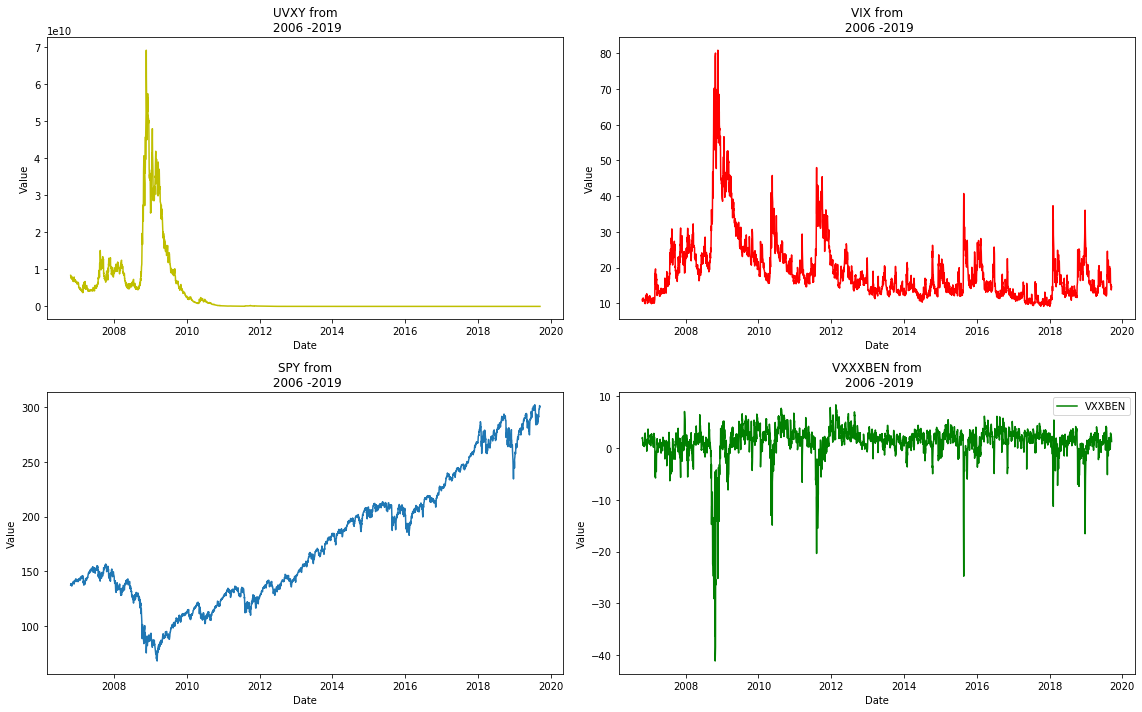

In [157]:
fig, axes = plt.subplots(2,2, figsize = (16,10))
axes[0,0].plot(filtered_Data["UVXY"], color = "y", label = "UVXY")
axes[0,0].set_xlabel("Date")
axes[0,0].set_ylabel("Value")
axes[0,0].set_title("UVXY from\n 2006 -2019")
axes[0,1].plot(filtered_Data["VIX"], color = "r", label = "VIX")
axes[0,1].set_xlabel("Date")
axes[0,1].set_ylabel("Value")
axes[0,1].set_title("VIX from\n 2006 -2019")
axes[1,1].plot(filtered_Data["VXXBEN"], color = "g", label = "VXXBEN")
axes[1,1].set_xlabel("Date")
axes[1,1].set_ylabel("Value")
axes[1,1].set_title("VXXXBEN from\n 2006 -2019")
axes[1,0].plot(filtered_Data["SPY"], label = "SPY")
axes[1,0].set_xlabel("Date")
axes[1,0].set_ylabel("Value")
axes[1,0].set_title("SPY from\n 2006 -2019")
plt.tight_layout()
plt.legend();

# WE will evaluate each of the securties above individually and follw with any coorelation between them. 

### Lets plot uvxy and seethe changes over the time frame

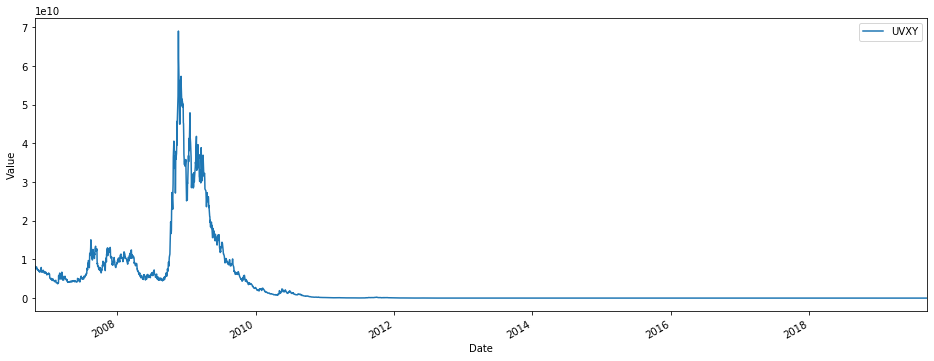

In [158]:
filtered_Data["UVXY"].plot(figsize = (16,6), label = "UVXY")
plt.ylabel("Value")
plt.legend()

### What was the highest value of UVXY and what date.

## Highs

In [159]:
filtered_Data["UVXY"].max()

69072366961.0

In [160]:
filtered_Data["UVXY"].astype(float).idxmax()

Timestamp('2008-11-20 00:00:00')

In [161]:
filtered_Data.loc["2008-11-20"]

UVXY                  6.907237e+10
SPY                   7.545000e+01
VXXBEN               -2.517500e+01
VIX                   8.086000e+01
UX1                   6.623000e+01
UX2                   5.977000e+01
UX3                   5.467000e+01
UX4                   5.058000e+01
Day OF Week           4.000000e+00
Rolling Days          1.800000e+01
UVXY Daily Changes    1.057043e-01
UVXY Daily Return     8.245410e+00
VIX Daily Changes     8.887692e-02
VXXBEN daily          2.552979e-01
SPY Daily Changes    -7.423313e-02
UX1_daily changes     5.294118e-02
UX2_daily changes     5.099349e-02
UX3_daily changes     4.611558e-02
UX4_daily changes     6.844106e-02
Name: 2008-11-20 00:00:00, dtype: float64

## Lows

In [162]:
filtered_Data["UVXY"].min()

23.63

In [163]:
filtered_Data["UVXY"].idxmin()

Timestamp('2019-07-24 00:00:00')

In [164]:
filtered_Data.loc["2019-07-24"]

UVXY                  2.363000e+01
SPY                   3.014400e+02
VXXBEN                4.182500e+00
VIX                   1.207000e+01
UX1                   1.437500e+01
UX2                   1.582500e+01
UX3                   1.622500e+01
UX4                   1.637500e+01
Day OF Week           3.000000e+00
Rolling Days          2.100000e+01
UVXY Daily Changes   -3.904026e-02
UVXY Daily Return     2.820796e-09
VIX Daily Changes    -4.282316e-02
VXXBEN daily          6.628426e-02
SPY Daily Changes     4.699530e-03
UX1_daily changes    -2.707276e-02
UX2_daily changes    -1.860465e-02
UX3_daily changes    -1.815431e-02
UX4_daily changes    -1.503759e-02
Name: 2019-07-24 00:00:00, dtype: float64

### Lets check the daily changes of UVXY over the time frame

In [165]:
uvxy_DailyChanges = filtered_Data["UVXY"].pct_change()

In [166]:
filtered_Data["UVXY Daily Changes"] = uvxy_DailyChanges

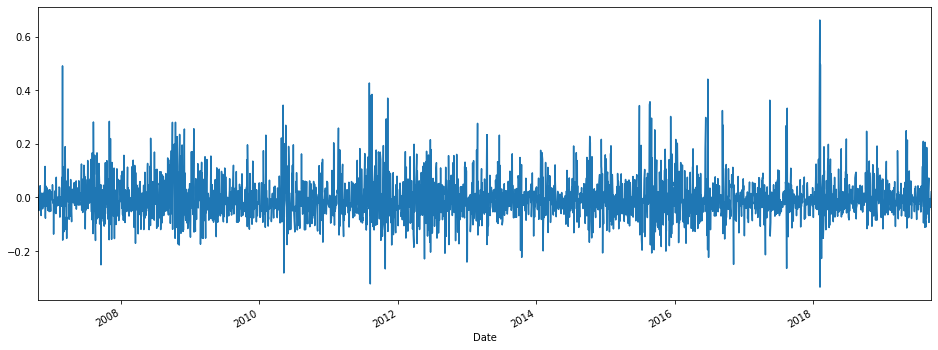

In [167]:
filtered_Data["UVXY Daily Changes"].plot(figsize = (16,6));

### Looks like there was a big change in UVXY early 2018. What was the exact date and why did this occurr

## Highs

In [168]:
filtered_Data["UVXY Daily Changes"].max()

0.6620639534883721

In [169]:
filtered_Data["UVXY Daily Changes"].idxmax()

Timestamp('2018-02-05 00:00:00')

In [170]:
filtered_Data.loc["2018-02-05"]

UVXY                  1.143500e+02
SPY                   2.639300e+02
VXXBEN               -8.767500e+00
VIX                   3.732000e+01
UX1                   3.322500e+01
UX2                   2.797500e+01
UX3                   2.472500e+01
UX4                   2.095000e+01
Day OF Week           1.000000e+00
Rolling Days          8.000000e+00
UVXY Daily Changes    6.620640e-01
UVXY Daily Return     1.365036e-08
VIX Daily Changes     1.155979e+00
VXXBEN daily          2.073620e+00
SPY Daily Changes    -4.182247e-02
UX1_daily changes     1.126400e+00
UX2_daily changes     8.681135e-01
UX3_daily changes     6.401327e-01
UX4_daily changes     3.715221e-01
Name: 2018-02-05 00:00:00, dtype: float64

### Lows

In [171]:
filtered_Data["UVXY Daily Changes"].min()

-0.3344993441189331

In [172]:
filtered_Data["UVXY Daily Changes"].idxmin()

Timestamp('2018-02-06 00:00:00')

In [173]:
filtered_Data.loc["2018-02-06"]

UVXY                  7.610000e+01
SPY                   2.691300e+02
VXXBEN               -1.058250e+01
VIX                   2.998000e+01
UX1                   2.387500e+01
UX2                   2.102500e+01
UX3                   2.000000e+01
UX4                   1.922500e+01
Day OF Week           2.000000e+00
Rolling Days          7.000000e+00
UVXY Daily Changes   -3.344993e-01
UVXY Daily Return     9.084323e-09
VIX Daily Changes    -1.966774e-01
VXXBEN daily          2.070145e-01
SPY Daily Changes     1.970219e-02
UX1_daily changes    -2.814146e-01
UX2_daily changes    -2.484361e-01
UX3_daily changes    -1.911021e-01
UX4_daily changes    -8.233890e-02
Name: 2018-02-06 00:00:00, dtype: float64

### Lets check the rolling average of UVXY over the peroid 

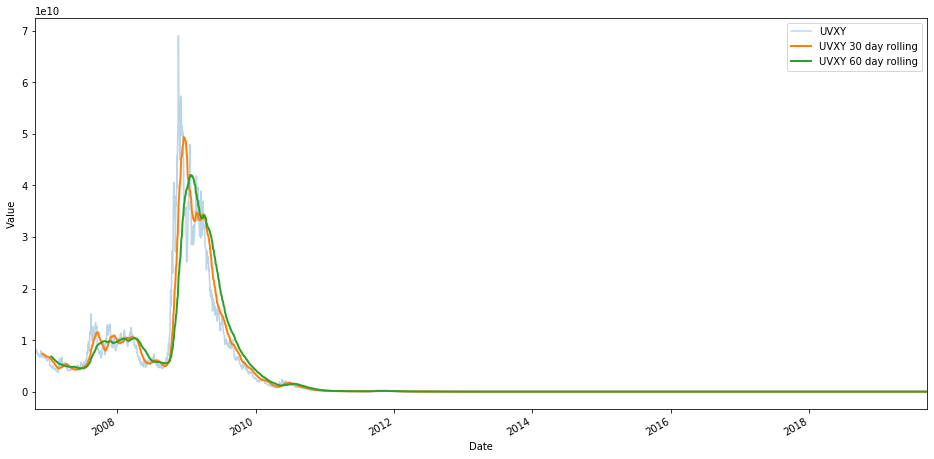

In [174]:
filtered_Data["UVXY"].plot(figsize = (16,8), label = "UVXY", alpha = 0.3)
filtered_Data.rolling(30).mean()["UVXY"].plot(label = "UVXY 30 day rolling", lw = 2)
filtered_Data.rolling(60).mean()["UVXY"].plot(label = "UVXY 60 day rolling", lw = 2)
plt.ylabel("Value")
plt.legend();

### we will calculate the returns from UVXY over the period if we were to buy on the first day in the data set

In [175]:
filtered_Data["UVXY Daily Return"] = (1 + filtered_Data["UVXY Daily Changes"]).cumprod()

In [176]:
filtered_Data.head(10)

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day OF Week,Rolling Days,UVXY Daily Changes,UVXY Daily Return,VIX Daily Changes,VXXBEN daily,SPY Daily Changes,UX1_daily changes,UX2_daily changes,UX3_daily changes,UX4_daily changes
Date,,,,,,,,,,,,,,,,,,,
2006-10-23,8.377069e+09,137.47,1.910,11.08,11.95,13.16,14.08,14.60,2,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-24,8.377069e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3,16,0.000000,1.000000,-0.027076,0.060209,0.002982,-0.014226,-0.025076,-0.003551,-0.008904
2006-10-25,7.968986e+09,138.35,1.760,10.66,11.49,12.52,13.79,14.52,4,15,-0.048714,0.951286,-0.011132,-0.130864,0.003409,-0.024618,-0.024162,-0.017106,0.003455
2006-10-26,7.618653e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5,14,-0.043962,0.909465,-0.009381,-0.139205,0.003108,-0.020888,-0.024760,-0.023930,-0.023416
2006-10-27,7.695087e+09,137.91,1.240,10.80,11.31,12.26,13.46,14.24,6,13,0.010032,0.918589,0.022727,-0.181518,-0.006269,0.005333,0.004095,0.000000,0.004231
2006-10-30,7.754190e+09,137.81,0.700,11.20,11.35,12.30,13.40,14.09,2,12,0.007681,0.925645,0.037037,-0.435484,-0.000725,0.003537,0.003263,-0.004458,-0.010534
2006-10-31,7.644418e+09,137.79,0.740,11.10,11.31,12.16,13.23,13.99,3,11,-0.014156,0.912541,-0.008929,0.057143,-0.000145,-0.003524,-0.011382,-0.012687,-0.007097
2006-11-01,7.978771e+09,136.86,0.500,11.51,11.55,12.43,13.22,13.94,4,10,0.043738,0.952454,0.036937,-0.324324,-0.006749,0.021220,0.022204,-0.000756,-0.003574
2006-11-02,8.084421e+09,136.78,0.765,11.42,11.65,12.49,13.20,13.86,5,9,0.013241,0.965066,-0.007819,0.530000,-0.000585,0.008658,0.004827,-0.001513,-0.005739


### We will plot the daily returns for UVXY for the data set

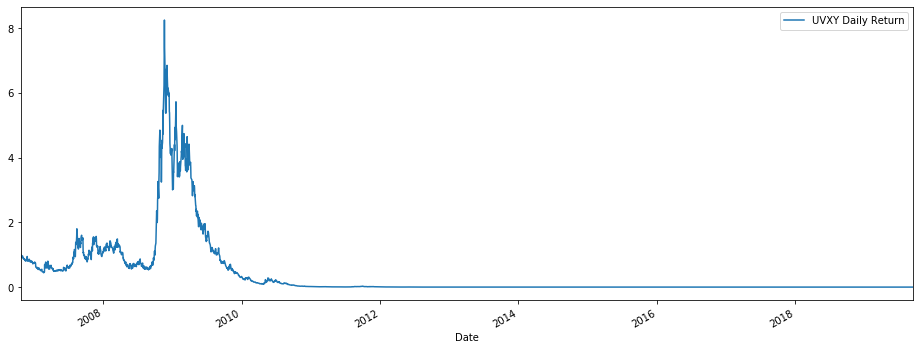

In [177]:
filtered_Data["UVXY Daily Return"].plot(figsize = (16,6), label = "UVXY Daily Return")
plt.legend();

### what was the day with the highest return

In [178]:
filtered_Data["UVXY Daily Return"].max()

8.245409811186573

In [179]:
filtered_Data["UVXY Daily Return"].idxmax()

Timestamp('2008-11-20 00:00:00')

In [180]:
filtered_Data.loc["2008-11-20"]

UVXY                  6.907237e+10
SPY                   7.545000e+01
VXXBEN               -2.517500e+01
VIX                   8.086000e+01
UX1                   6.623000e+01
UX2                   5.977000e+01
UX3                   5.467000e+01
UX4                   5.058000e+01
Day OF Week           4.000000e+00
Rolling Days          1.800000e+01
UVXY Daily Changes    1.057043e-01
UVXY Daily Return     8.245410e+00
VIX Daily Changes     8.887692e-02
VXXBEN daily          2.552979e-01
SPY Daily Changes    -7.423313e-02
UX1_daily changes     5.294118e-02
UX2_daily changes     5.099349e-02
UX3_daily changes     4.611558e-02
UX4_daily changes     6.844106e-02
Name: 2008-11-20 00:00:00, dtype: float64

_______

## We will analyze VIX

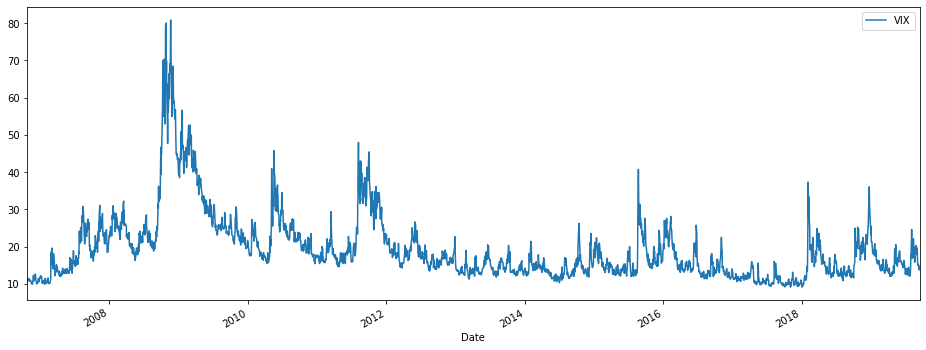

In [181]:
filtered_Data["VIX"].plot(figsize = (16,6), label = "VIX")
plt.legend()

## Highs

In [182]:
filtered_Data["VIX"].max()

80.86

In [183]:
filtered_Data["VIX"].idxmax()

Timestamp('2008-11-20 00:00:00')

In [184]:
filtered_Data.loc["2008-11-20"]

UVXY                  6.907237e+10
SPY                   7.545000e+01
VXXBEN               -2.517500e+01
VIX                   8.086000e+01
UX1                   6.623000e+01
UX2                   5.977000e+01
UX3                   5.467000e+01
UX4                   5.058000e+01
Day OF Week           4.000000e+00
Rolling Days          1.800000e+01
UVXY Daily Changes    1.057043e-01
UVXY Daily Return     8.245410e+00
VIX Daily Changes     8.887692e-02
VXXBEN daily          2.552979e-01
SPY Daily Changes    -7.423313e-02
UX1_daily changes     5.294118e-02
UX2_daily changes     5.099349e-02
UX3_daily changes     4.611558e-02
UX4_daily changes     6.844106e-02
Name: 2008-11-20 00:00:00, dtype: float64

_________

## Lows

In [185]:
filtered_Data["VIX"].min()

9.14

In [186]:
filtered_Data["VIX"].idxmin()

Timestamp('2017-11-03 00:00:00')

In [187]:
filtered_Data.loc["2017-11-03"]

UVXY                  7.520000e+01
SPY                   2.584500e+02
VXXBEN                3.427500e+00
VIX                   9.140000e+00
UX1                   1.097500e+01
UX2                   1.232500e+01
UX3                   1.347500e+01
UX4                   1.412500e+01
Day OF Week           5.000000e+00
Rolling Days          9.000000e+00
UVXY Daily Changes   -5.948447e-03
UVXY Daily Return     8.976887e-09
VIX Daily Changes    -7.955690e-02
VXXBEN daily          4.477297e-01
SPY Daily Changes     3.338639e-03
UX1_daily changes    -1.348315e-02
UX2_daily changes     4.073320e-03
UX3_daily changes     3.724395e-03
UX4_daily changes     7.130125e-03
Name: 2017-11-03 00:00:00, dtype: float64

### We will calculate  VIX daily Changes

In [188]:
filtered_Data["VIX Daily Changes"] = filtered_Data["VIX"].pct_change()

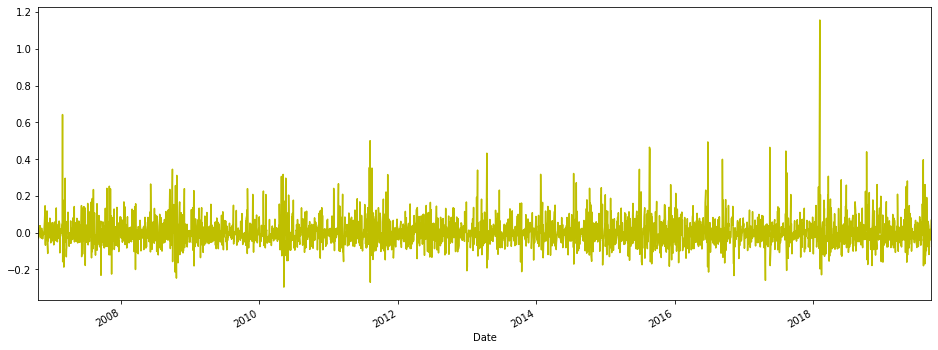

In [189]:
filtered_Data["VIX Daily Changes"].plot(figsize = (16,6), color = "y")

### Hmm seems to be the the most significant change in ViX my have occurred around the same time at UVXY. lets check the date and see if it matches 

# Highs

In [190]:
filtered_Data["VIX Daily Changes"].max()

1.1559792027729636

In [191]:
filtered_Data["VIX Daily Changes"].idxmax()

Timestamp('2018-02-05 00:00:00')

In [192]:
filtered_Data.loc["2018-02-05"]

UVXY                  1.143500e+02
SPY                   2.639300e+02
VXXBEN               -8.767500e+00
VIX                   3.732000e+01
UX1                   3.322500e+01
UX2                   2.797500e+01
UX3                   2.472500e+01
UX4                   2.095000e+01
Day OF Week           1.000000e+00
Rolling Days          8.000000e+00
UVXY Daily Changes    6.620640e-01
UVXY Daily Return     1.365036e-08
VIX Daily Changes     1.155979e+00
VXXBEN daily          2.073620e+00
SPY Daily Changes    -4.182247e-02
UX1_daily changes     1.126400e+00
UX2_daily changes     8.681135e-01
UX3_daily changes     6.401327e-01
UX4_daily changes     3.715221e-01
Name: 2018-02-05 00:00:00, dtype: float64

_____

# Lows

In [193]:
filtered_Data["VIX Daily Changes"].min()

-0.2957264957264958

In [194]:
filtered_Data["VIX Daily Changes"].idxmin()

Timestamp('2010-05-10 00:00:00')

In [195]:
filtered_Data.loc['2010-05-10']

UVXY                  1.387224e+09
SPY                   1.161600e+02
VXXBEN               -2.285000e+00
VIX                   2.884000e+01
UX1                   2.745000e+01
UX2                   2.705000e+01
UX3                   2.785000e+01
UX4                   2.790000e+01
Day OF Week           1.000000e+00
Rolling Days          7.000000e+00
UVXY Daily Changes   -2.818051e-01
UVXY Daily Return     1.655978e-01
VIX Daily Changes    -2.957265e-01
VXXBEN daily         -8.242308e-01
SPY Daily Changes     4.404099e-02
UX1_daily changes    -1.669196e-01
UX2_daily changes    -1.260097e-01
UX3_daily changes    -9.870550e-02
UX4_daily changes    -9.268293e-02
Name: 2010-05-10 00:00:00, dtype: float64

___

# VXXBEN Analysis

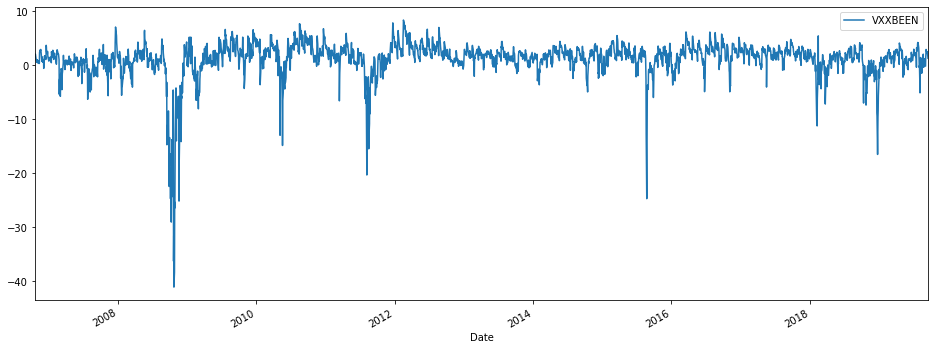

In [196]:
filtered_Data["VXXBEN"].plot(figsize = (16,6), label = "VXXBEEN")
plt.legend();

### there is a significant drop in  VXXBEN in the middle of 2008. This must be related to the market crash . What date was this and what was the max and max values of VXXBEN.

# Highs

In [197]:
filtered_Data["VXXBEN"].max()

8.33

In [198]:
filtered_Data["VXXBEN"].idxmax()

Timestamp('2012-02-17 00:00:00')

In [199]:
filtered_Data.loc["2012-02-17"]

UVXY                  3.959999e+07
SPY                   1.364100e+02
VXXBEN                8.330000e+00
VIX                   1.778000e+01
UX1                   2.260000e+01
UX2                   2.480000e+01
UX3                   2.575000e+01
UX4                   2.685000e+01
Day OF Week           5.000000e+00
Rolling Days          2.200000e+01
UVXY Daily Changes   -1.199454e-02
UVXY Daily Return     4.727189e-03
VIX Daily Changes    -7.492196e-02
VXXBEN daily          3.232724e-01
SPY Daily Changes     2.653456e-03
UX1_daily changes    -8.771930e-03
UX2_daily changes     6.085193e-03
UX3_daily changes     3.898635e-03
UX4_daily changes     7.504690e-03
Name: 2012-02-17 00:00:00, dtype: float64

___

# Lows

In [200]:
filtered_Data["VXXBEN"].min()

-41.09499999999999

In [201]:
filtered_Data["VXXBEN"].idxmin()

Timestamp('2008-10-24 00:00:00')

In [202]:
filtered_Data.loc["2008-10-24"]

UVXY                  3.635303e+10
SPY                   8.704000e+01
VXXBEN               -4.109500e+01
VIX                   7.913000e+01
UX1                   5.582000e+01
UX2                   4.356000e+01
UX3                   4.069000e+01
UX4                   3.923000e+01
Day OF Week           5.000000e+00
Rolling Days          1.800000e+01
UVXY Daily Changes    2.269418e-01
UVXY Daily Return     4.339589e+00
VIX Daily Changes     1.671091e-01
VXXBEN daily          3.000633e-01
SPY Daily Changes    -5.071436e-02
UX1_daily changes     1.159536e-01
UX2_daily changes     8.520179e-02
UX3_daily changes     6.769877e-02
UX4_daily changes     7.538377e-02
Name: 2008-10-24 00:00:00, dtype: float64

### Appears that when VXXBEN was at its lowest value of -41.1 UVXY dropped 22% and vix dropped 16% and vix was at 79.13 

### VXXBEN highest value was at 8.33 and at this point VIX was at 17.78. All returns were are significant lows the higher the value of VXXBEN. So we may have the ability to makethe assumption that the lower the value of VXXBEEN the greater the chances of a higher return. Lets next calculate the daily changed for the value of VXXBEN!

In [203]:
filtered_Data["VXXBEN daily"] = filtered_Data["VXXBEN"].pct_change()

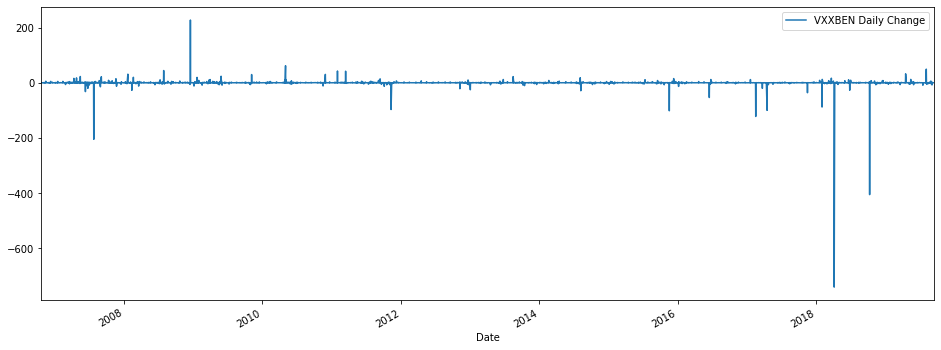

In [204]:
filtered_Data["VXXBEN daily"].plot(figsize = (16,6), label = "VXXBEN Daily Change")
plt.legend();

# Highs

In [205]:
filtered_Data["VXXBEN daily"].max()

inf

In [206]:
filtered_Data["VXXBEN daily"].idxmax()

Timestamp('2007-11-06 00:00:00')

In [207]:
filtered_Data.loc["2008-12-17"]

UVXY                  4.507960e+10
SPY                   9.099000e+01
VXXBEN                2.280000e+00
VIX                   4.984000e+01
UX1                   5.207000e+01
UX2                   4.994000e+01
UX3                   4.618000e+01
UX4                   4.391000e+01
Day OF Week           3.000000e+00
Rolling Days          2.200000e+01
UVXY Daily Changes   -6.887241e-03
UVXY Daily Return     5.381310e+00
VIX Daily Changes    -4.831010e-02
VXXBEN daily          2.270000e+02
SPY Daily Changes    -9.686548e-03
UX1_daily changes    -7.055683e-03
UX2_daily changes    -4.421053e-02
UX3_daily changes    -8.154336e-02
UX4_daily changes    -6.074866e-02
Name: 2008-12-17 00:00:00, dtype: float64

In [208]:
filtered_Data["VXXBEN daily"].idxmax()

Timestamp('2007-11-06 00:00:00')

# a bit off here lets check the previous dates

In [209]:
filtered_Data["2008-12-10":"2008-12-17"]

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day OF Week,Rolling Days,UVXY Daily Changes,UVXY Daily Return,VIX Daily Changes,VXXBEN daily,SPY Daily Changes,UX1_daily changes,UX2_daily changes,UX3_daily changes,UX4_daily changes
Date,,,,,,,,,,,,,,,,,,,
2008-12-10,4.964861e+10,90.11,-1.115,55.73,55.26,54.44,52.76,48.48,3,5,-0.035675,5.926727,-0.053981,-0.739181,0.006816,-0.020213,-0.016974,-0.010688,-0.006964
2008-12-11,5.083524e+10,87.94,-0.950,55.78,55.06,55.32,53.38,49.09,4,4,0.023901,6.068380,0.000897,-0.147982,-0.024082,-0.003619,0.016165,0.011751,0.012583
2008-12-12,4.936387e+10,88.99,0.390,54.28,54.58,54.46,52.80,48.58,5,3,-0.028944,5.892738,-0.026891,-1.410526,0.011940,-0.008718,-0.015546,-0.010865,-0.010389
2008-12-15,5.019381e+10,87.75,-2.020,56.76,55.70,54.84,52.63,48.63,1,2,0.016813,5.991811,0.045689,-6.179487,-0.013934,0.020520,0.006978,-0.003220,0.001029
2008-12-16,4.539223e+10,91.88,0.010,52.37,52.44,52.25,50.28,46.75,2,1,-0.095661,5.418629,-0.077343,-1.004950,0.047066,-0.058528,-0.047228,-0.044651,-0.038659
2008-12-17,4.507960e+10,90.99,2.280,49.84,52.07,49.94,46.18,43.91,3,22,-0.006887,5.381310,-0.048310,227.000000,-0.009687,-0.007056,-0.044211,-0.081543,-0.060749


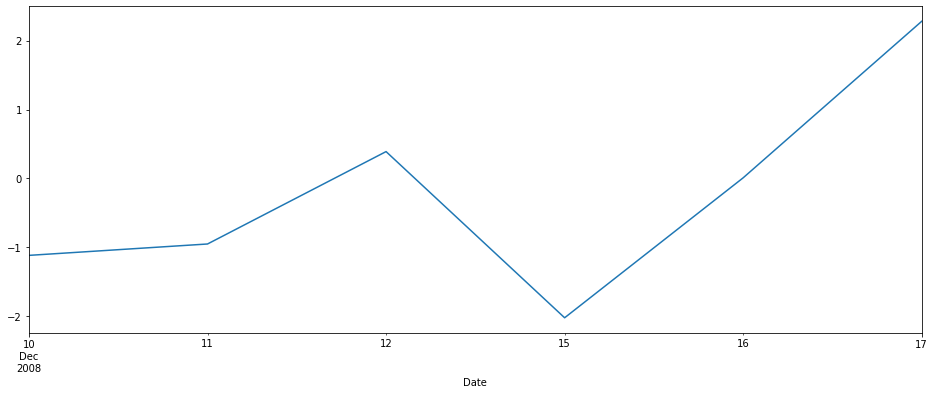

In [210]:
filtered_Data["2008-12-10":"2008-12-17"]["VXXBEN"].plot(figsize = (16,6));

____

# We will analyze SPY which will represent the S&P500 before dividends are paid 

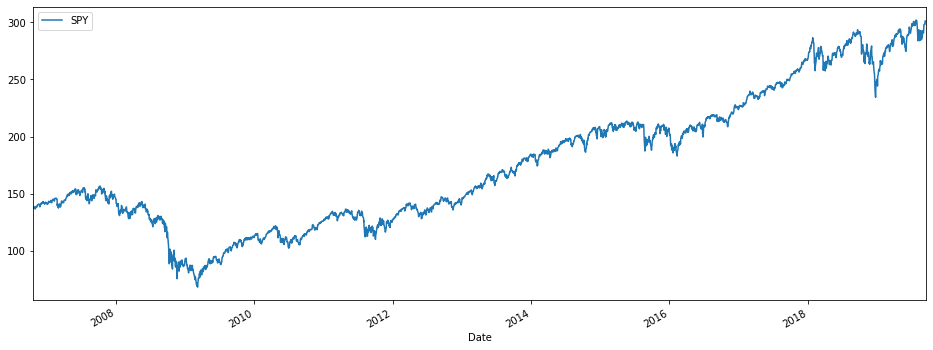

In [211]:
filtered_Data["SPY"].plot(figsize = (16,6), label = "SPY")
plt.legend();

### WE will inspect the lowest and highest values of SPY

### Lows 

In [212]:
filtered_Data["SPY"].min()

68.11

In [213]:
filtered_Data["SPY"].astype(float).idxmin()

Timestamp('2009-03-09 00:00:00')

In [214]:
filtered_Data.loc["2009-03-09"]

UVXY                  3.708983e+10
SPY                   6.811000e+01
VXXBEN               -5.020000e+00
VIX                   4.968000e+01
UX1                   4.705000e+01
UX2                   4.490000e+01
UX3                   4.180000e+01
UX4                   4.035000e+01
Day OF Week           1.000000e+00
Rolling Days          7.000000e+00
UVXY Daily Changes    2.792011e-02
UVXY Daily Return     4.427543e+00
VIX Daily Changes     7.095074e-03
VXXBEN daily         -4.743833e-02
SPY Daily Changes    -1.175276e-02
UX1_daily changes     8.574491e-03
UX2_daily changes     1.698754e-02
UX3_daily changes     9.661836e-03
UX4_daily changes     6.234414e-03
Name: 2009-03-09 00:00:00, dtype: float64

### Highs

In [215]:
filtered_Data["SPY"].max()

302.01

In [216]:
filtered_Data["SPY"].astype(float).idxmax()

Timestamp('2019-07-26 00:00:00')

In [217]:
filtered_Data.loc["2019-07-26"]

UVXY                  2.378000e+01
SPY                   3.020100e+02
VXXBEN                4.047500e+00
VIX                   1.216000e+01
UX1                   1.437500e+01
UX2                   1.582500e+01
UX3                   1.627500e+01
UX4                   1.647500e+01
Day OF Week           5.000000e+00
Rolling Days          1.900000e+01
UVXY Daily Changes   -3.490260e-02
UVXY Daily Return     2.838702e-09
VIX Daily Changes    -4.552590e-02
VXXBEN daily          1.157822e-01
SPY Daily Changes     6.700000e-03
UX1_daily changes    -2.044293e-02
UX2_daily changes    -1.860465e-02
UX3_daily changes    -1.512859e-02
UX4_daily changes    -9.022556e-03
Name: 2019-07-26 00:00:00, dtype: float64

# daily changes in SPY

In [218]:
filtered_Data["SPY Daily Changes"] = filtered_Data["SPY"].pct_change()

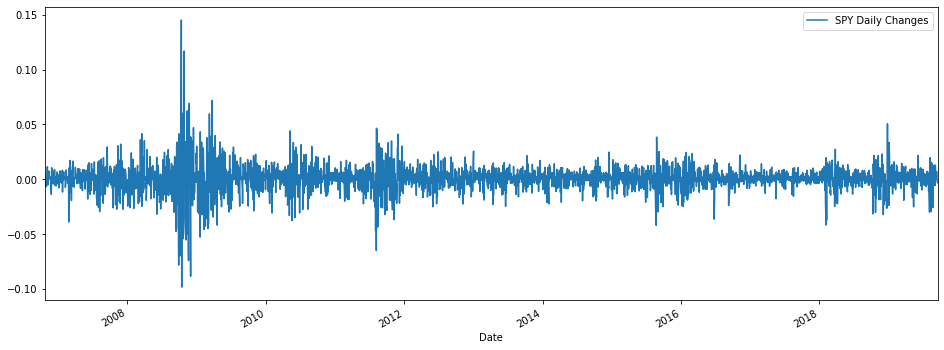

In [219]:
filtered_Data["SPY Daily Changes"].plot(figsize = (16,6), label = "SPY Daily Changes")
plt.legend();

## Highs

In [220]:
filtered_Data["SPY Daily Changes"].max()

0.14519774011299424

In [221]:
filtered_Data["SPY Daily Changes"].idxmax()

Timestamp('2008-10-13 00:00:00')

In [222]:
filtered_Data.loc["2008-10-13"]

UVXY                  1.670382e+10
SPY                   1.013500e+02
VXXBEN               -1.381000e+01
VIX                   5.499000e+01
UX1                   5.064000e+01
UX2                   3.607000e+01
UX3                   3.178000e+01
UX4                   3.052000e+01
Day OF Week           1.000000e+00
Rolling Days          7.000000e+00
UVXY Daily Changes   -1.523508e-01
UVXY Daily Return     1.993993e+00
VIX Daily Changes    -2.138670e-01
VXXBEN daily         -5.247763e-01
SPY Daily Changes     1.451977e-01
UX1_daily changes    -1.070358e-01
UX2_daily changes    -5.847037e-02
UX3_daily changes    -5.948505e-02
UX4_daily changes    -5.860580e-02
Name: 2008-10-13 00:00:00, dtype: float64

## Lows 

In [223]:
filtered_Data["SPY Daily Changes"].min()

-0.09844767150726086

In [224]:
filtered_Data["SPY Daily Changes"].idxmin()

Timestamp('2008-10-15 00:00:00')

In [225]:
filtered_Data.loc["2008-10-15"]

UVXY                  2.251538e+10
SPY                   9.002000e+01
VXXBEN               -2.434500e+01
VIX                   6.925000e+01
UX1                   5.818000e+01
UX2                   4.270000e+01
UX3                   3.555000e+01
UX4                   3.449000e+01
Day OF Week           3.000000e+00
Rolling Days          5.000000e+00
UVXY Daily Changes    2.805914e-01
UVXY Daily Return     2.687740e+00
VIX Daily Changes     2.561219e-01
VXXBEN daily          6.589438e-01
SPY Daily Changes    -9.844767e-02
UX1_daily changes     1.861366e-01
UX2_daily changes     1.254613e-01
UX3_daily changes     1.026675e-01
UX4_daily changes     9.910771e-02
Name: 2008-10-15 00:00:00, dtype: float64

### WE Will take a look at the volitility of the changes in ViX, Vxxben, UVXY, and SPY 

In [226]:
changes_Frame = pd.concat([filtered_Data["VIX Daily Changes"], filtered_Data["VXXBEN daily"], filtered_Data["UVXY Daily Changes"], filtered_Data["SPY Daily Changes"]], axis=1)
changes_Frame.columns = ["Vix_change", "VXXBEN_change", "UVXY_change", "SPY_change"]

In [227]:
changes_Frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3246 entries, 2006-10-23 to 2019-09-16
Data columns (total 4 columns):
Vix_change       3245 non-null float64
VXXBEN_change    3245 non-null float64
UVXY_change      3245 non-null float64
SPY_change       3245 non-null float64
dtypes: float64(4)
memory usage: 286.8 KB


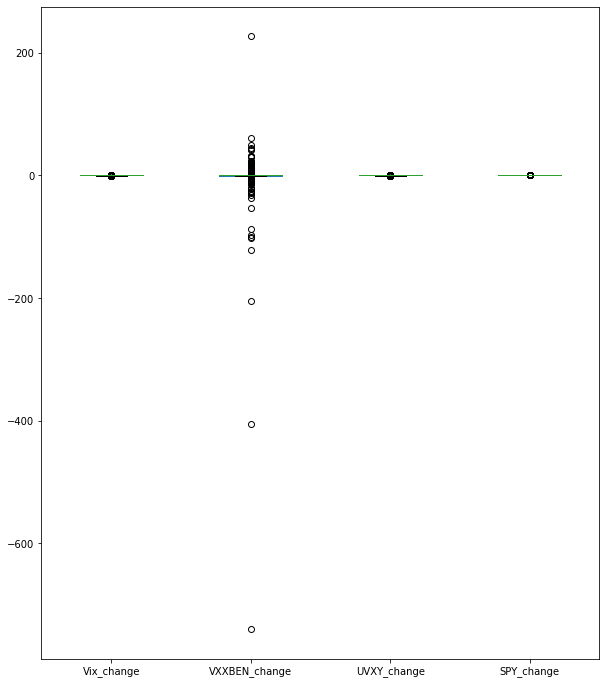

In [228]:
changes_Frame.plot(kind = "box", figsize = (10,12))

In [229]:
changes_Frame["VXXBEN_change"].max()

inf

In [230]:
changes_Frame["VXXBEN_change"].min()

-740.0

________

# WE will begain to analyze UX1 -> UX4 and their changes  

In [231]:
filtered_Data["UX1_daily changes"] = filtered_Data["UX1"].pct_change()

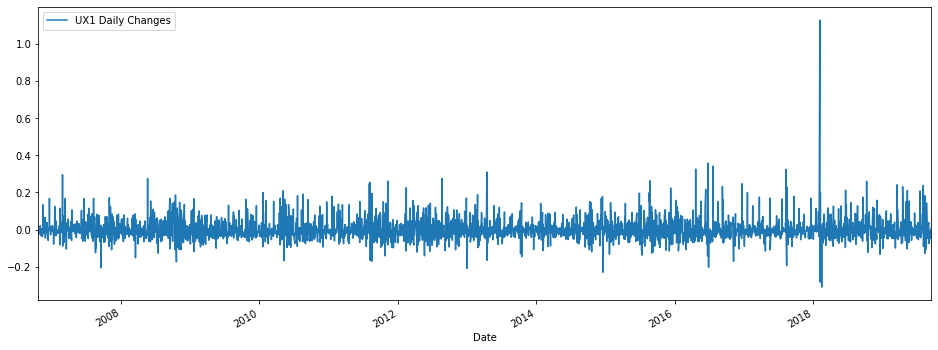

In [232]:
filtered_Data["UX1_daily changes"].plot(figsize = (16,6), label = "UX1 Daily Changes")
plt.legend();

In [233]:
filtered_Data["UX1_daily changes"].max()

1.1264000000000003

In [234]:
filtered_Data["UX1_daily changes"].idxmax()

Timestamp('2018-02-05 00:00:00')

In [235]:
filtered_Data.loc["2018-02-05"]

UVXY                  1.143500e+02
SPY                   2.639300e+02
VXXBEN               -8.767500e+00
VIX                   3.732000e+01
UX1                   3.322500e+01
UX2                   2.797500e+01
UX3                   2.472500e+01
UX4                   2.095000e+01
Day OF Week           1.000000e+00
Rolling Days          8.000000e+00
UVXY Daily Changes    6.620640e-01
UVXY Daily Return     1.365036e-08
VIX Daily Changes     1.155979e+00
VXXBEN daily          2.073620e+00
SPY Daily Changes    -4.182247e-02
UX1_daily changes     1.126400e+00
UX2_daily changes     8.681135e-01
UX3_daily changes     6.401327e-01
UX4_daily changes     3.715221e-01
Name: 2018-02-05 00:00:00, dtype: float64

#### Few days before

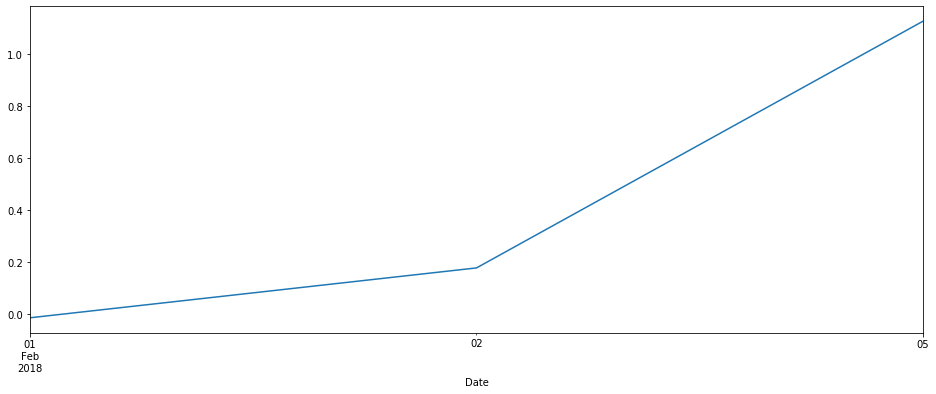

In [236]:
filtered_Data.loc["2018-02-01":"2018-02-05"]["UX1_daily changes"].plot(figsize = (16,6))

### UX2

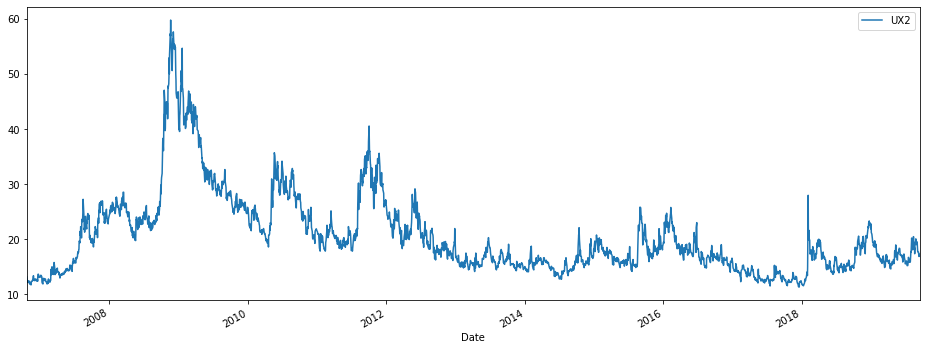

In [237]:
filtered_Data["UX2"].plot(figsize = (16,6), label = "UX2")
plt.legend()

#### Daily changes for UX2

In [238]:
filtered_Data["UX2_daily changes"] = filtered_Data["UX2"].pct_change()

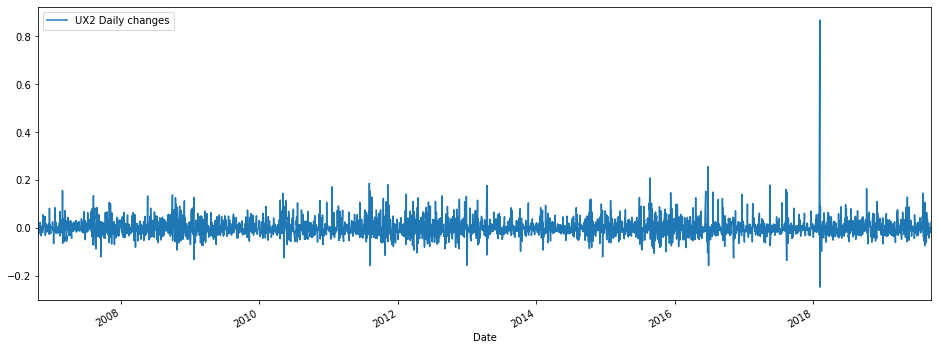

In [239]:
filtered_Data["UX2_daily changes"].plot(figsize = (16,6), label = "UX2 Daily changes")
plt.legend()

## Highs

In [240]:
filtered_Data["UX2_daily changes"].max()

0.8681135225375627

In [241]:
filtered_Data["UX2_daily changes"].idxmax()

Timestamp('2018-02-05 00:00:00')

In [242]:
filtered_Data.loc["2018-02-05"]

UVXY                  1.143500e+02
SPY                   2.639300e+02
VXXBEN               -8.767500e+00
VIX                   3.732000e+01
UX1                   3.322500e+01
UX2                   2.797500e+01
UX3                   2.472500e+01
UX4                   2.095000e+01
Day OF Week           1.000000e+00
Rolling Days          8.000000e+00
UVXY Daily Changes    6.620640e-01
UVXY Daily Return     1.365036e-08
VIX Daily Changes     1.155979e+00
VXXBEN daily          2.073620e+00
SPY Daily Changes    -4.182247e-02
UX1_daily changes     1.126400e+00
UX2_daily changes     8.681135e-01
UX3_daily changes     6.401327e-01
UX4_daily changes     3.715221e-01
Name: 2018-02-05 00:00:00, dtype: float64

### Few days before

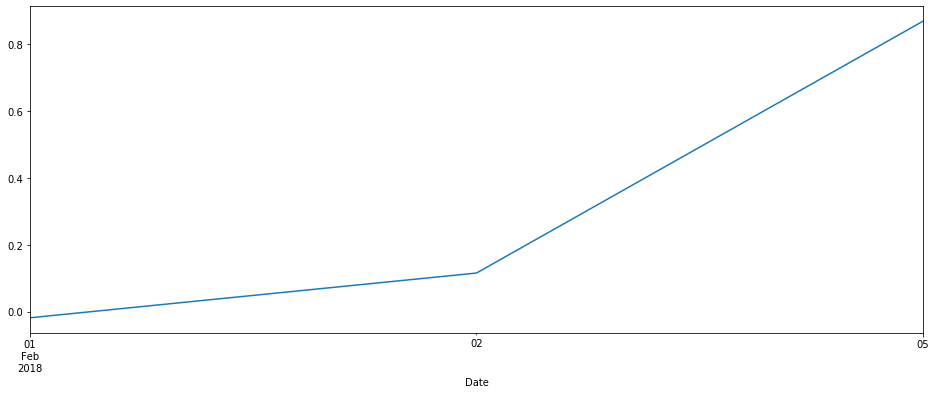

In [243]:
filtered_Data["2018-02-01":"2018-02-05"]["UX2_daily changes"].plot(figsize = (16,6))

## Lows

In [244]:
filtered_Data["UX2_daily changes"].min()

-0.24843610366398583

In [245]:
filtered_Data["UX2_daily changes"].idxmin()

Timestamp('2018-02-06 00:00:00')

In [246]:
filtered_Data.loc["2018-02-06"]

UVXY                  7.610000e+01
SPY                   2.691300e+02
VXXBEN               -1.058250e+01
VIX                   2.998000e+01
UX1                   2.387500e+01
UX2                   2.102500e+01
UX3                   2.000000e+01
UX4                   1.922500e+01
Day OF Week           2.000000e+00
Rolling Days          7.000000e+00
UVXY Daily Changes   -3.344993e-01
UVXY Daily Return     9.084323e-09
VIX Daily Changes    -1.966774e-01
VXXBEN daily          2.070145e-01
SPY Daily Changes     1.970219e-02
UX1_daily changes    -2.814146e-01
UX2_daily changes    -2.484361e-01
UX3_daily changes    -1.911021e-01
UX4_daily changes    -8.233890e-02
Name: 2018-02-06 00:00:00, dtype: float64

## few days before

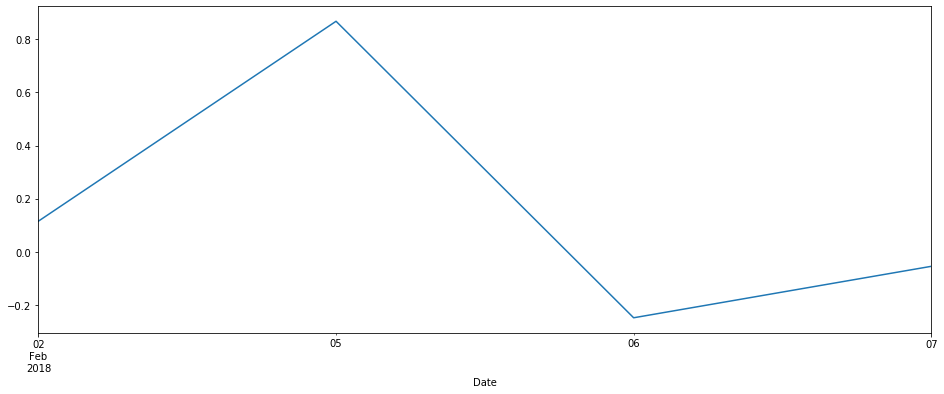

In [247]:
filtered_Data.loc["2018-02-02":"2018-02-07"]["UX2_daily changes"].plot(figsize =(16,6))

# UX3 analysis

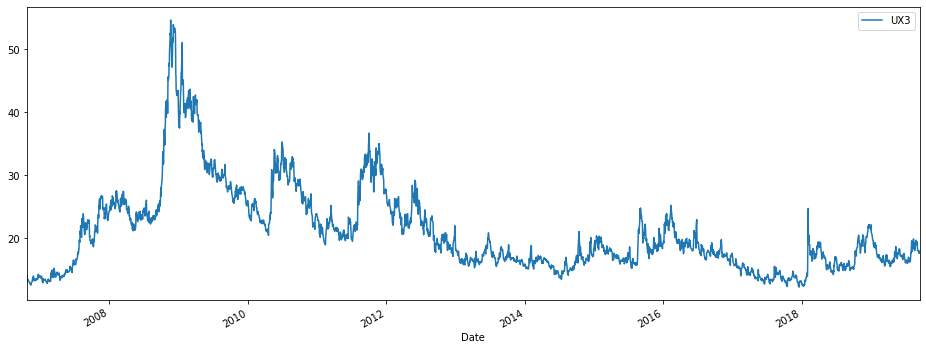

In [248]:
filtered_Data["UX3"].plot(figsize = (16,6), label = "UX3")
plt.legend();

# daily changes

In [249]:
filtered_Data["UX3_daily changes"] = filtered_Data["UX3"].pct_change()

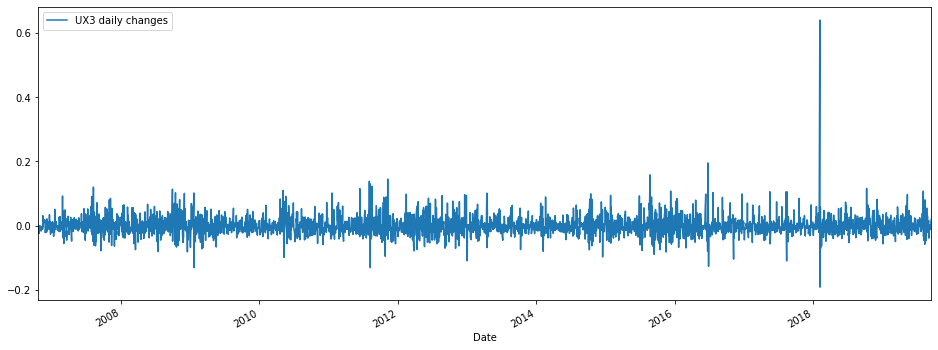

In [250]:
filtered_Data["UX3_daily changes"].plot(figsize = (16,6), label = "UX3 daily changes")
plt.legend();

# Highs 

In [251]:
filtered_Data["UX3_daily changes"].max()

0.6401326699834164

In [252]:
filtered_Data["UX3_daily changes"].idxmax()

Timestamp('2018-02-05 00:00:00')

In [253]:
filtered_Data.loc["2018-02-05"]

UVXY                  1.143500e+02
SPY                   2.639300e+02
VXXBEN               -8.767500e+00
VIX                   3.732000e+01
UX1                   3.322500e+01
UX2                   2.797500e+01
UX3                   2.472500e+01
UX4                   2.095000e+01
Day OF Week           1.000000e+00
Rolling Days          8.000000e+00
UVXY Daily Changes    6.620640e-01
UVXY Daily Return     1.365036e-08
VIX Daily Changes     1.155979e+00
VXXBEN daily          2.073620e+00
SPY Daily Changes    -4.182247e-02
UX1_daily changes     1.126400e+00
UX2_daily changes     8.681135e-01
UX3_daily changes     6.401327e-01
UX4_daily changes     3.715221e-01
Name: 2018-02-05 00:00:00, dtype: float64

## Few days before

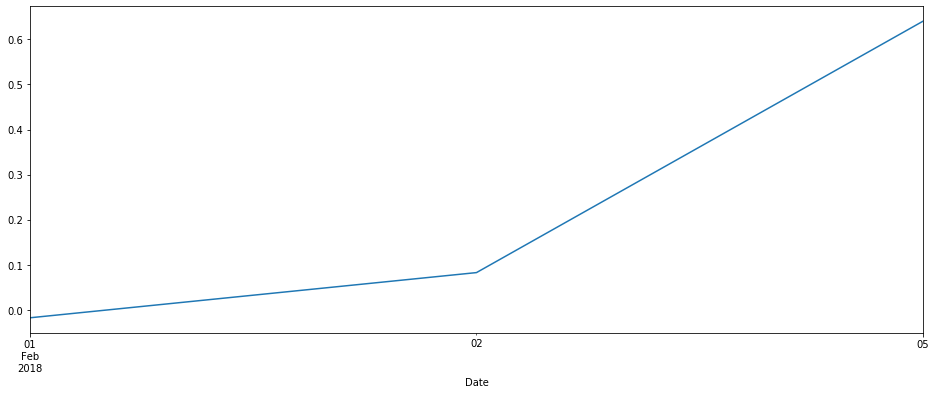

In [254]:
filtered_Data.loc["2018-02-01": "2018-02-05"]["UX3_daily changes"].plot(figsize = (16,6));

# Lows 

In [255]:
filtered_Data["UX3_daily changes"].min()

-0.19110212335692622

In [256]:
filtered_Data["UX3_daily changes"].idxmin()

Timestamp('2018-02-06 00:00:00')

In [257]:
filtered_Data.loc["2018-02-06"]

UVXY                  7.610000e+01
SPY                   2.691300e+02
VXXBEN               -1.058250e+01
VIX                   2.998000e+01
UX1                   2.387500e+01
UX2                   2.102500e+01
UX3                   2.000000e+01
UX4                   1.922500e+01
Day OF Week           2.000000e+00
Rolling Days          7.000000e+00
UVXY Daily Changes   -3.344993e-01
UVXY Daily Return     9.084323e-09
VIX Daily Changes    -1.966774e-01
VXXBEN daily          2.070145e-01
SPY Daily Changes     1.970219e-02
UX1_daily changes    -2.814146e-01
UX2_daily changes    -2.484361e-01
UX3_daily changes    -1.911021e-01
UX4_daily changes    -8.233890e-02
Name: 2018-02-06 00:00:00, dtype: float64

# UX4

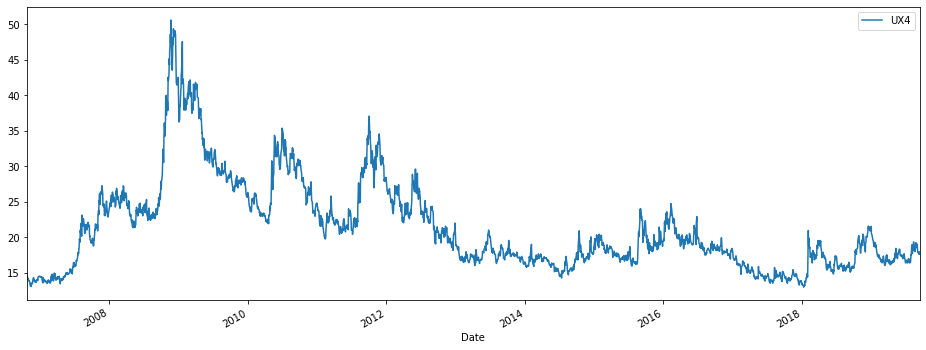

In [258]:
filtered_Data["UX4"].plot(figsize = (16,6), label = "UX4")
plt.legend();


# Daily changes

In [259]:
filtered_Data["UX4_daily changes"] = filtered_Data["UX4"].pct_change()

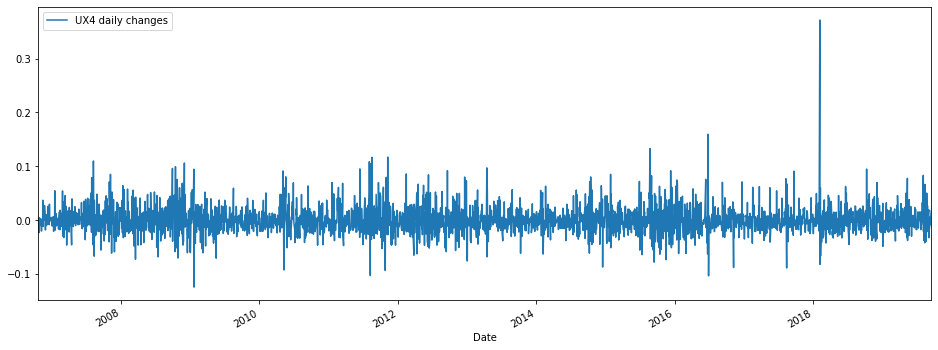

In [260]:
filtered_Data["UX4_daily changes"].plot(figsize = (16,6), label = "UX4 daily changes")
plt.legend()

# Highs

In [261]:
filtered_Data["UX4_daily changes"].max()

0.37152209492635024

In [262]:
filtered_Data["UX4_daily changes"].idxmax()

Timestamp('2018-02-05 00:00:00')

In [263]:
filtered_Data.loc["2018-02-05"]

UVXY                  1.143500e+02
SPY                   2.639300e+02
VXXBEN               -8.767500e+00
VIX                   3.732000e+01
UX1                   3.322500e+01
UX2                   2.797500e+01
UX3                   2.472500e+01
UX4                   2.095000e+01
Day OF Week           1.000000e+00
Rolling Days          8.000000e+00
UVXY Daily Changes    6.620640e-01
UVXY Daily Return     1.365036e-08
VIX Daily Changes     1.155979e+00
VXXBEN daily          2.073620e+00
SPY Daily Changes    -4.182247e-02
UX1_daily changes     1.126400e+00
UX2_daily changes     8.681135e-01
UX3_daily changes     6.401327e-01
UX4_daily changes     3.715221e-01
Name: 2018-02-05 00:00:00, dtype: float64

### Few days before 

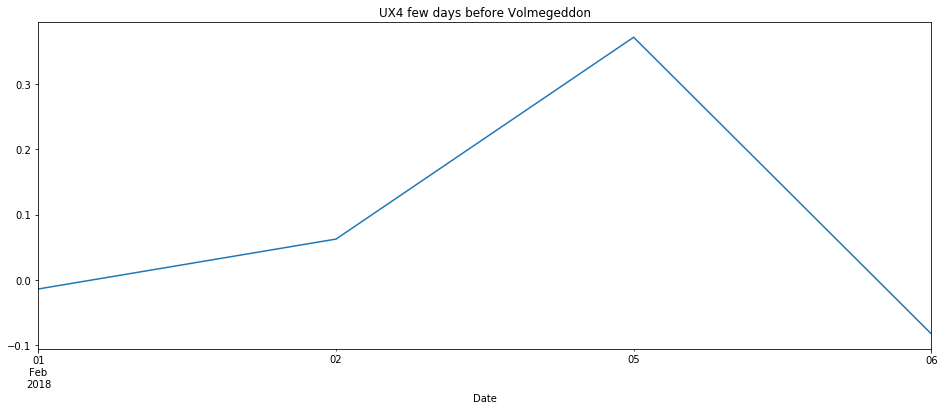

In [264]:
filtered_Data.loc["2018-02-01":"2018-02-06"]["UX4_daily changes"].plot(figsize = (16,6), title = "UX4 few days before Volmegeddon");

# Lows

In [265]:
filtered_Data["UX4_daily changes"].min()

-0.12452671434581408

In [266]:
filtered_Data["UX4_daily changes"].idxmin()

Timestamp('2009-01-21 00:00:00')

In [267]:
filtered_Data.loc["2009-01-21"]

UVXY                  4.173336e+10
SPY                   8.405000e+01
VXXBEN                5.180000e+00
VIX                   4.642000e+01
UX1                   5.113000e+01
UX2                   4.736000e+01
UX3                   4.440000e+01
UX4                   4.162000e+01
Day OF Week           3.000000e+00
Rolling Days          1.900000e+01
UVXY Daily Changes   -1.291543e-01
UVXY Daily Return     4.981857e+00
VIX Daily Changes    -1.805825e-01
VXXBEN daily          1.931373e+01
SPY Daily Changes     4.319226e-02
UX1_daily changes    -1.169257e-01
UX2_daily changes    -1.335529e-01
UX3_daily changes    -1.307753e-01
UX4_daily changes    -1.245267e-01
Name: 2009-01-21 00:00:00, dtype: float64

# few days before

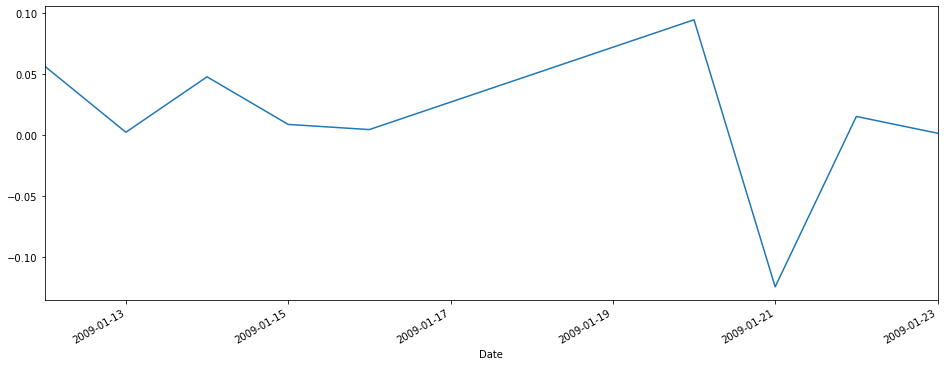

In [268]:
filtered_Data.loc["2009-01-10": "2009-01-23"]["UX4_daily changes"].plot(figsize = (16,6))

_______

# We will use a box plot to evaluate UX1-> UX4 volitility and movement over the period

In [269]:
UX_one_to_four_changes = pd.concat([filtered_Data["UX1_daily changes"], filtered_Data["UX2_daily changes"], filtered_Data["UX3_daily changes"], filtered_Data["UX4_daily changes"]], axis=1)
UX_one_to_four_changes.columns = ["UX1_changes", "UX2_changes", "UX3_changes", "UX4_changes"]

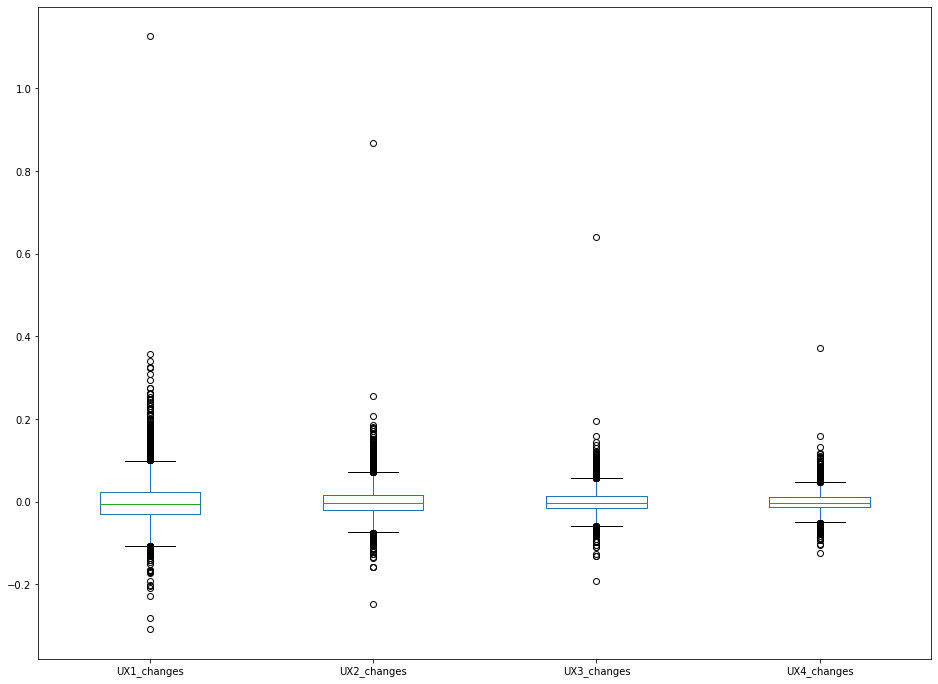

In [270]:
UX_one_to_four_changes.plot(kind = "box", figsize = (16,12));

# Summarize the box plot here

_______

# We will do a analysis of VIX and VXXBEN Changes to see if there is an correltaiton in the movementof the data 

In [271]:
vix_vxxben_changes = pd.concat([filtered_Data["VXXBEN daily"], filtered_Data["VIX Daily Changes"]], axis=1)
vix_vxxben_changes.columns = ["VXXBEN daily changes", "VIX daily changes"]

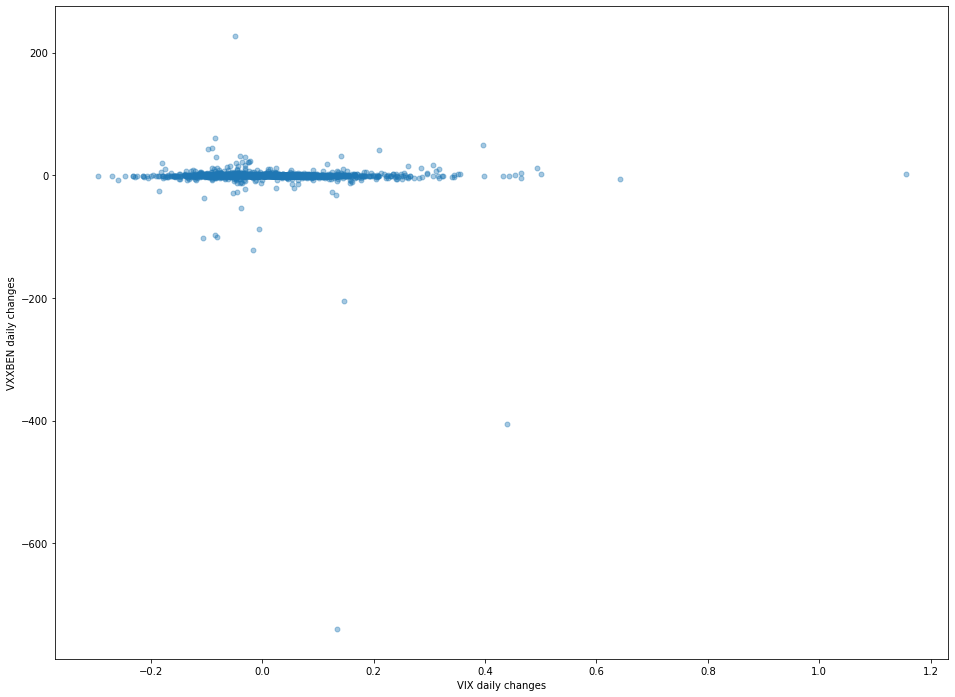

In [272]:
vix_vxxben_changes.plot(kind = "scatter", s = 24,alpha = 0.4,x = "VIX daily changes", y = "VXXBEN daily changes",figsize = (16,12))

## appears there is some correlation to the data here so we will run a regression analyisis with the changes in vix anfd vxxben

In [275]:
vix_vxxben_changes.dropna(inplace=True)

In [298]:
vix_vxxben_changes["VXXBEN daily changes"].min()

-740.0

In [299]:
vix_vxxben_changes.loc["2007-11-06", "VXXBEN daily changes"] = 0.0

In [300]:
x_constant = sm.add_constant(vix_vxxben_changes["VIX daily changes"])
y = vix_vxxben_changes["VXXBEN daily changes"]
model = sm.OLS(y,x_constant).fit()

In [301]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:              OLS                  Adj. R-squared:     0.004     
Dependent Variable: VXXBEN daily changes AIC:                27438.0535
Date:               2020-01-09 11:09     BIC:                27450.2232
No. Observations:   3245                 Log-Likelihood:     -13717.   
Df Model:           1                    F-statistic:        15.49     
Df Residuals:       3243                 Prob (F-statistic): 8.46e-05  
R-squared:          0.005                Scale:              275.06    
-----------------------------------------------------------------------
                       Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
-----------------------------------------------------------------------
const                  -0.3963   0.2914 -1.3602 0.1738  -0.9676  0.1749
VIX daily changes     -14.2109   3.6105 -3.9361 0.0001 -21.2899 -7.1319
-----------------------------------------------------------------------
Omnibus:             8676.180      Durbin-Watson:         2.007        
Prob(Omnibus):       0.000         Jarque-Bera (JB):      238935026.330
Skew:                -31.535       Prob(JB):              0.000        
Kurtosis:            1330.849      Condition No.:         12           
=======================================================================

"""

In [302]:
regressionLine = model.predict()
regressionLine

array([-0.0115458 , -0.23812618, -0.26300757, ..., -0.01697106,
        0.0833756 , -1.35819393])

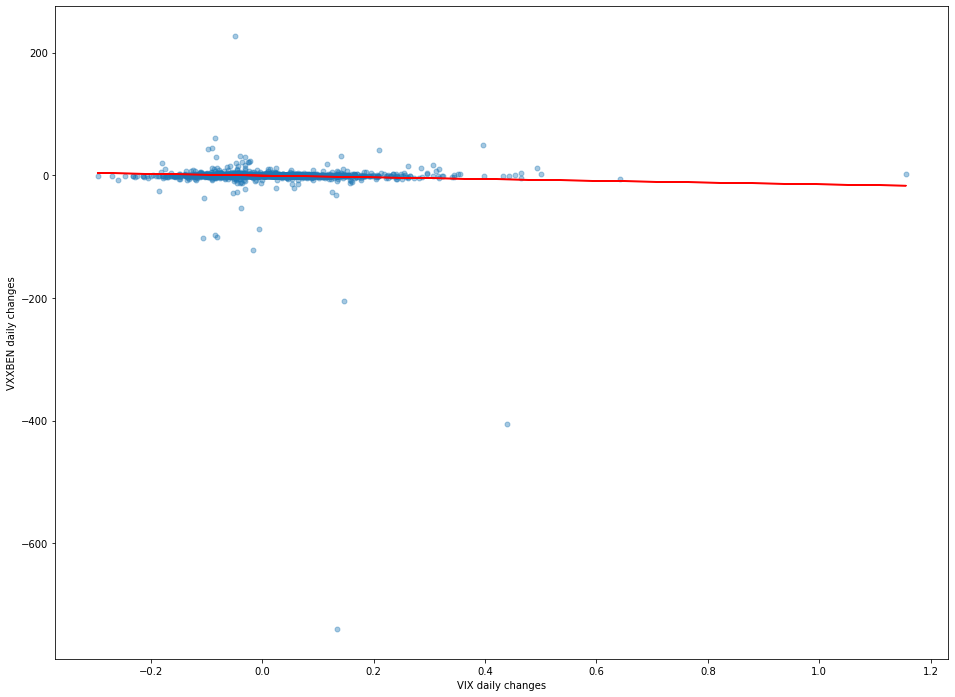

In [303]:
vix_vxxben_changes.plot(kind = "scatter", s = 24,alpha = 0.4,x = "VIX daily changes", y = "VXXBEN daily changes",figsize = (16,12))
plt.plot(vix_vxxben_changes["VIX daily changes"], regressionLine, label = "regression Line", c = "r")

In [304]:
vix_vxxben_changes.corr()

,VXXBEN daily changes,VIX daily changes
VXXBEN daily changes,1.000000,-0.068953
VIX daily changes,-0.068953,1.000000


In [335]:
filtered_Data.drop("UVXY Daily Return", inplace=True, axis=1)

In [337]:
filtered_Data.to_csv("vixDataUpdated")